# Layerwise decoders

These decoders 'straddle' the layers that they decode: randomizing the CLS tokens, passing them through the layer, and decoding the outputs

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize

import seaborn as sns

import numpy as np
import pandas as pd

from tqdm import tqdm

import torch

In [2]:
from src.model.setup import image_model_setup
model_name = "facebook/dinov2-base"
dataset_name = "temp_dataset_subsample"

model, image_datasets, _ = image_model_setup(model_name, dataset_name, 1000)
model_analysis, _, _ = image_model_setup(model_name, dataset_name, 1000)
model_analysis.to('mps')

W0209 22:59:34.369000 62023 torch/distributed/elastic/multiprocessing/redirects.py:29] NOTE: Redirects are currently not supported in Windows or MacOs.


import error: No module named 'triton'


Some weights of Dinov2ForImageClassification were not initialized from the model checkpoint at facebook/dinov2-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of Dinov2ForImageClassification were not initialized from the model checkpoint at facebook/dinov2-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [3]:
from src.data.activity_dataset import OnlineLayerInputDataset
from src.model.CLS_token_probing import ModuleSpecificDecoder
from src.train.middle_decoders import train_module_decoder


## Train the straddle models 

In [4]:
i = 10
layer_name = f'dinov2.encoder.layer.{i}'

ds_train = OnlineLayerInputDataset(model, layer_name, image_datasets['train'], device='mps')
ds_validation = OnlineLayerInputDataset(model, layer_name, image_datasets['validation'], device='mps')

probe = ModuleSpecificDecoder()
base_module = model_analysis.module_dict[layer_name]

model_out = train_module_decoder(probe, base_module, ds_train, ds_validation)
model_out.save_pretrained(f'layer{i}_probe')

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
wandb: Currently logged in as: lrast to https://api.wandb.ai. Use `wandb login --relogin` to force relogin



  | Name        | Type                  | Params | Mode 
--------------------------------------------------------------
0 | decoder     | ModuleSpecificDecoder | 2.1 M  | train
1 | base_module | Dinov2Layer           | 7.1 M  | eval 
--------------------------------------------------------------
2.1 M     Trainable params
7.1 M     Non-trainable params
9.2 M     Total params
36.698    Total estimated model params size (MB)
15        Modules in train mode
18        Modules in eval mode


Sanity Checking: |                                        | 0/? [00:00<?, ?it/s]

Training: |                                               | 0/? [00:00<?, ?it/s]

/Users/luke/.local/defaultPythonEnv/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:870: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved. New best score: 0.707


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved by 0.044 >= min_delta = 0.0. New best score: 0.752


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved by 0.015 >= min_delta = 0.0. New best score: 0.766
`Trainer.fit` stopped: `max_epochs=3` reached.


epoch,▁▁▁▁▁▁▁▁▁▁▁▁▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅████████████
lr-Adam,████████▇▇▇▇▆▆▆▆▆▅▅▅▄▄▄▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁
train/loss,█▃▃▃▃▂▃▂▂▂▂▂▂▂▂▁▂▂▂▁▂▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▁▂▂▂▂▃▃▃▃▃▃▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇█████
val/accuracy,▁▆█
val/loss,█▂▁
epoch,2
lr-Adam,0.0
train/loss,0.62412
trainer/global_step,9374
val/accuracy,0.76606


In [4]:
for i in [8, 9, 11]:
    layer_name = f'dinov2.encoder.layer.{i}'
    
    ds_train = OnlineLayerInputDataset(model, layer_name, image_datasets['train'], device='mps')
    ds_validation = OnlineLayerInputDataset(model, layer_name, image_datasets['validation'], device='mps')
    
    probe = ModuleSpecificDecoder.from_pretrained('layer10_probe')
    base_module = model_analysis.module_dict[layer_name]
    
    model_out = train_module_decoder(probe, base_module, ds_train, ds_validation)
    model_out.save_pretrained(f'layer{i}_probe')

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Loading weights from local directory


wandb: Currently logged in as: lrast to https://api.wandb.ai. Use `wandb login --relogin` to force relogin



  | Name        | Type                  | Params | Mode 
--------------------------------------------------------------
0 | decoder     | ModuleSpecificDecoder | 2.1 M  | train
1 | base_module | Dinov2Layer           | 7.1 M  | eval 
--------------------------------------------------------------
2.1 M     Trainable params
7.1 M     Non-trainable params
9.2 M     Total params
36.698    Total estimated model params size (MB)
15        Modules in train mode
18        Modules in eval mode


Sanity Checking: |                                        | 0/? [00:00<?, ?it/s]

Training: |                                               | 0/? [00:00<?, ?it/s]

/Users/luke/.local/defaultPythonEnv/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:870: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved. New best score: 0.538


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved by 0.062 >= min_delta = 0.0. New best score: 0.600


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved by 0.017 >= min_delta = 0.0. New best score: 0.617
`Trainer.fit` stopped: `max_epochs=3` reached.


epoch,▁▁▁▁▁▁▁▁▁▁▁▁▁▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅████████████
lr-Adam,████▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▂▂▂▂▁▁▁▁▁▁▁
train/loss,█▇▆▅▄▄▄▄▄▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▂▂▂▂▁▂▂▂▁▂
trainer/global_step,▁▁▁▁▂▂▂▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▇▇▇██
val/accuracy,▁▆█
val/loss,█▂▁
epoch,2
lr-Adam,0.0
train/loss,1.22883
trainer/global_step,9374
val/accuracy,0.61706


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Loading weights from local directory



  | Name        | Type                  | Params | Mode 
--------------------------------------------------------------
0 | decoder     | ModuleSpecificDecoder | 2.1 M  | train
1 | base_module | Dinov2Layer           | 7.1 M  | eval 
--------------------------------------------------------------
2.1 M     Trainable params
7.1 M     Non-trainable params
9.2 M     Total params
36.698    Total estimated model params size (MB)
15        Modules in train mode
18        Modules in eval mode


Sanity Checking: |                                        | 0/? [00:00<?, ?it/s]

Training: |                                               | 0/? [00:00<?, ?it/s]

/Users/luke/.local/defaultPythonEnv/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:870: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved. New best score: 0.617


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved by 0.050 >= min_delta = 0.0. New best score: 0.667


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved by 0.015 >= min_delta = 0.0. New best score: 0.682
`Trainer.fit` stopped: `max_epochs=3` reached.


epoch,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▅▅▅▅▅▅▅▅▅▅▅███████████████
lr-Adam,██████████▇▇▇▇▇▇▇▆▆▆▅▅▅▄▄▄▄▄▄▃▂▂▂▂▁▁▁▁▁▁
train/loss,█▇▅▅▄▄▃▃▃▄▃▃▃▃▃▂▂▃▂▂▁▂▂▁▂▂▂▁▁▂▁▂▁▁▂▂▁▂▁▁
trainer/global_step,▁▁▁▁▂▂▂▂▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇█
val/accuracy,▁▆█
val/loss,█▂▁
epoch,2
lr-Adam,0.0
train/loss,1.01511
trainer/global_step,9374
val/accuracy,0.68186


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Loading weights from local directory



  | Name        | Type                  | Params | Mode 
--------------------------------------------------------------
0 | decoder     | ModuleSpecificDecoder | 2.1 M  | train
1 | base_module | Dinov2Layer           | 7.1 M  | eval 
--------------------------------------------------------------
2.1 M     Trainable params
7.1 M     Non-trainable params
9.2 M     Total params
36.698    Total estimated model params size (MB)
15        Modules in train mode
18        Modules in eval mode


Sanity Checking: |                                        | 0/? [00:00<?, ?it/s]

Training: |                                               | 0/? [00:00<?, ?it/s]

/Users/luke/.local/defaultPythonEnv/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:870: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved. New best score: 0.786


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved by 0.021 >= min_delta = 0.0. New best score: 0.807


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved by 0.010 >= min_delta = 0.0. New best score: 0.818
`Trainer.fit` stopped: `max_epochs=3` reached.


epoch,▁▁▁▁▁▁▁▁▁▁▁▁▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅███████████
lr-Adam,█████▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁
train/loss,█▅▄▇▇▅▆▄▅▃▃▃▅▄▃▂▅▄▂▂▂▂▂▃▃▂▃▂▂▁▂▂▁▂▂▂▂▁▁▁
trainer/global_step,▁▁▂▂▂▃▃▃▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇██████
val/accuracy,▁▆█
val/loss,█▂▁
epoch,2
lr-Adam,0.0
train/loss,0.32423
trainer/global_step,9374
val/accuracy,0.81768


Overall impressions on the validation accuracy
1. The accuracies are quite impressive. Substantially better than the shuffled accuracies previously. This includes the final layer: progressive read-outs on the CLS token don't appear to ever be necessary. Accuracies: ~82%, 77%, 68%, 62% (vs 75%, 60%, 50%, 40% for the previous probe readouts, fairly consistently across different models.)

2. There were still improvements (~1-3%) happening on epoch 3. We could certainly train longer to squeeze out even better performance.

### Training probes without CLS token randomization

In [4]:
i = 10
layer_name = f'dinov2.encoder.layer.{i}'

ds_train = OnlineLayerInputDataset(model, layer_name, image_datasets['train'], device='mps')
ds_validation = OnlineLayerInputDataset(model, layer_name, image_datasets['validation'], device='mps')

probe = ModuleSpecificDecoder(mode='null')
base_module = model_analysis.module_dict[layer_name]

model_out = train_module_decoder(probe, base_module, ds_train, ds_validation)
model_out.save_pretrained(f'layer{i}_probe_unrandomized')

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
wandb: Currently logged in as: lrast to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>


  | Name         | Type                  | Params | Mode 
---------------------------------------------------------------
0 | decoder      | ModuleSpecificDecoder | 2.1 M  | train
1 | base_modules | Dinov2Layer           | 7.1 M  | eval 
---------------------------------------------------------------
2.1 M     Trainable params
7.1 M     Non-trainable params
9.2 M     Total params
36.698    Total estimated model params size (MB)
15        Modules in train mode
18        Modules in eval mode


Sanity Checking: |                                        | 0/? [00:00<?, ?it/s]

Training: |                                               | 0/? [00:00<?, ?it/s]

/Users/luke/.local/defaultPythonEnv/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:870: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved. New best score: 0.732


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved by 0.034 >= min_delta = 0.0. New best score: 0.766


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved by 0.013 >= min_delta = 0.0. New best score: 0.780
`Trainer.fit` stopped: `max_epochs=3` reached.


<IPython.core.display.HTML object>

epoch,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▅▅▅▅▅▅▅▅▅▅▅▅█████████████
lr-Adam,██████████▇▇▇▇▇▇▇▆▆▆▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▁▁▁
train/loss,██▆▇▅▆▅▆▅▄▅▄▄▅▆▃▄▄▃▂▂▃▂▃▂▂▃▂▁▁▂▂▁▂▂▂▂▂▃▃
trainer/global_step,▁▁▁▂▂▂▂▂▂▂▂▃▃▃▃▃▃▃▃▄▄▄▄▄▄▄▄▄▄▄▅▅▅▅▆▆▆▆██
val/accuracy,▁▆█
val/loss,█▃▁
epoch,2
lr-Adam,0.0
train/loss,0.66626
trainer/global_step,9374
val/accuracy,0.77962


<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

In [4]:
for i in [8, 9, 11]:
    layer_name = f'dinov2.encoder.layer.{i}'
    
    ds_train = OnlineLayerInputDataset(model, layer_name, image_datasets['train'], device='mps')
    ds_validation = OnlineLayerInputDataset(model, layer_name, image_datasets['validation'], device='mps')
    
    probe = ModuleSpecificDecoder.from_pretrained('layer10_probe_unrandomized', mode='null)
    base_module = model_analysis.module_dict[layer_name]
    
    model_out = train_module_decoder(probe, base_module, ds_train, ds_validation)
    model_out.save_pretrained(f'layer{i}_probe_unrandomized')

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Loading weights from local directory


wandb: Currently logged in as: lrast to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>


  | Name         | Type                  | Params | Mode 
---------------------------------------------------------------
0 | decoder      | ModuleSpecificDecoder | 2.1 M  | train
1 | base_modules | Dinov2Layer           | 7.1 M  | eval 
---------------------------------------------------------------
2.1 M     Trainable params
7.1 M     Non-trainable params
9.2 M     Total params
36.698    Total estimated model params size (MB)
15        Modules in train mode
18        Modules in eval mode


Sanity Checking: |                                        | 0/? [00:00<?, ?it/s]

Training: |                                               | 0/? [00:00<?, ?it/s]

/Users/luke/.local/defaultPythonEnv/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:870: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved. New best score: 0.404


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved by 0.059 >= min_delta = 0.0. New best score: 0.462


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved by 0.014 >= min_delta = 0.0. New best score: 0.476
`Trainer.fit` stopped: `max_epochs=3` reached.


<IPython.core.display.HTML object>

epoch,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅██████████
lr-Adam,█████████▇▇▇▇▇▇▆▆▆▆▅▅▅▅▄▄▃▃▃▃▂▂▂▁▁▁▁▁▁▁▁
train/loss,█▇▆▆▅▅▅▃▃▃▃▄▃▃▃▃▃▂▁▂▂▃▂▁▃▂▂▁▁▁▁▂▂▁▁▁▂▁▂▂
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▄▄▄▄▄▄▄▄▅▅▅▅▆▆▆▆▆▆▆▆▇▇▇▇▇███
val/accuracy,▁▇█
val/loss,█▂▁
epoch,2
lr-Adam,0.0
train/loss,2.0944
trainer/global_step,9374
val/accuracy,0.47622


<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Loading weights from local directory


<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>


  | Name         | Type                  | Params | Mode 
---------------------------------------------------------------
0 | decoder      | ModuleSpecificDecoder | 2.1 M  | train
1 | base_modules | Dinov2Layer           | 7.1 M  | eval 
---------------------------------------------------------------
2.1 M     Trainable params
7.1 M     Non-trainable params
9.2 M     Total params
36.698    Total estimated model params size (MB)
15        Modules in train mode
18        Modules in eval mode


Sanity Checking: |                                        | 0/? [00:00<?, ?it/s]

Training: |                                               | 0/? [00:00<?, ?it/s]

/Users/luke/.local/defaultPythonEnv/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:870: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved. New best score: 0.591


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved by 0.044 >= min_delta = 0.0. New best score: 0.635


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved by 0.015 >= min_delta = 0.0. New best score: 0.650
`Trainer.fit` stopped: `max_epochs=3` reached.


<IPython.core.display.HTML object>

epoch,▁▁▁▁▁▁▁▁▁▁▁▁▁▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅████████████
lr-Adam,██████▇▇▆▆▆▆▅▅▅▄▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁▁▁▁▁
train/loss,█▆▅▅▄▄▄▃▃▃▄▃▂▃▂▃▁▂▂▂▂▂▂▂▁▂▁▂▂▂▂▂▂▁▂▂▂▂▂▂
trainer/global_step,▁▁▂▂▂▂▂▂▂▂▃▃▃▃▃▃▃▃▃▄▄▄▄▄▄▅▅▆▆▆▆▆▆▆▇▇▇███
val/accuracy,▁▆█
val/loss,█▂▁
epoch,2
lr-Adam,0.0
train/loss,1.27691
trainer/global_step,9374
val/accuracy,0.65004


<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Loading weights from local directory


<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>


  | Name         | Type                  | Params | Mode 
---------------------------------------------------------------
0 | decoder      | ModuleSpecificDecoder | 2.1 M  | train
1 | base_modules | Dinov2Layer           | 7.1 M  | eval 
---------------------------------------------------------------
2.1 M     Trainable params
7.1 M     Non-trainable params
9.2 M     Total params
36.698    Total estimated model params size (MB)
15        Modules in train mode
18        Modules in eval mode


Sanity Checking: |                                        | 0/? [00:00<?, ?it/s]

Training: |                                               | 0/? [00:00<?, ?it/s]

/Users/luke/.local/defaultPythonEnv/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:870: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved. New best score: 0.787


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved by 0.013 >= min_delta = 0.0. New best score: 0.800


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved by 0.009 >= min_delta = 0.0. New best score: 0.809
`Trainer.fit` stopped: `max_epochs=3` reached.


<IPython.core.display.HTML object>

epoch,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅████████
lr-Adam,█████▇▇▇▇▇▇▇▆▆▆▅▅▅▅▅▅▄▄▄▄▄▄▃▃▃▂▂▂▂▁▁▁▁▁▁
train/loss,▄▅▇▅▄▅▅▇▆▄▄█▄▆▃▅▆▇▅▃▄▃▃▂▂▁▂▁▃▂▂▂▁▂▂▂▃▂▁▂
trainer/global_step,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇██
val/accuracy,▁▅█
val/loss,█▃▁
epoch,2
lr-Adam,0.0
train/loss,0.25393
trainer/global_step,9374
val/accuracy,0.80872


<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

### Training probes with tokens and CLS tokens

In [4]:
i = 10
layer_name = f'dinov2.encoder.layer.{i}'

ds_train = OnlineLayerInputDataset(model, layer_name, image_datasets['train'], device='mps')
ds_validation = OnlineLayerInputDataset(model, layer_name, image_datasets['validation'], device='mps')

probe = ModuleSpecificDecoder(mode='augment')
base_module = model_analysis.module_dict[layer_name]

model_out = train_module_decoder(probe, base_module, ds_train, ds_validation)
model_out.save_pretrained(f'layer{i}_probe_unrandomized')

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
wandb: Currently logged in as: lrast to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>


  | Name         | Type                  | Params | Mode 
---------------------------------------------------------------
0 | decoder      | ModuleSpecificDecoder | 2.1 M  | train
1 | base_modules | Dinov2Layer           | 7.1 M  | eval 
---------------------------------------------------------------
2.1 M     Trainable params
7.1 M     Non-trainable params
9.2 M     Total params
36.698    Total estimated model params size (MB)
15        Modules in train mode
18        Modules in eval mode


Sanity Checking: |                                        | 0/? [00:00<?, ?it/s]

Training: |                                               | 0/? [00:00<?, ?it/s]

/Users/luke/.local/defaultPythonEnv/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:870: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved. New best score: 0.720


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved by 0.036 >= min_delta = 0.0. New best score: 0.757


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved by 0.014 >= min_delta = 0.0. New best score: 0.770
`Trainer.fit` stopped: `max_epochs=3` reached.


<IPython.core.display.HTML object>

epoch,▁▁▁▁▁▁▁▁▁▁▁▁▅▅▅▅▅▅▅▅▅▅▅█████████████████
lr-Adam,████████▇▇▇▇▇▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▂▂▂▁▁▁▁▁▁▁
train/loss,█▃▃▂▃▃▃▂▂▂▂▁▂▂▂▁▂▁▂▁▁▂▂▁▁▁▁▂▁▁▁▁▁▁▁▂▁▁▁▁
trainer/global_step,▁▁▁▁▁▂▂▂▂▂▃▃▄▄▄▄▄▄▄▄▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇█████
val/accuracy,▁▆█
val/loss,█▃▁
epoch,2
lr-Adam,0.0
train/loss,0.72426
trainer/global_step,9374
val/accuracy,0.77012


<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

##  Testing the straddle models

Notes / observations:
1. In one case layers 8 and 10 are correct and the other two are wrong. Does this happen a lot or is it mistaken randomization?

2. There is some noise in the outputs, as we would expect from the token randomization. ~90% consistency.

In [2]:
from src.model.setup import image_model_setup
from src.model.CLS_token_probing import ModuleSpecificDecoder
model_name = "facebook/dinov2-base"
dataset_name = "temp_dataset_subsample"

model, image_datasets, _ = image_model_setup(model_name, dataset_name, 1000)
_=model.model.eval()

W0205 18:27:35.264000 41514 torch/distributed/elastic/multiprocessing/redirects.py:29] NOTE: Redirects are currently not supported in Windows or MacOs.


import error: No module named 'triton'


Some weights of Dinov2ForImageClassification were not initialized from the model checkpoint at facebook/dinov2-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [3]:
readouts = {}
results_val = {'label': []}
results_test = {'label': []}

for i in range(8, 12):
    layer_name = f'dinov2.encoder.layer.{i}'
    probe = ModuleSpecificDecoder.from_pretrained(f'layer{i}_probe')
    probe.eval()

    readouts[layer_name] = probe
    results_val[layer_name] = []
    results_test[layer_name] = []

hooks = model.add_internal_readouts(readouts)

Loading weights from local directory
Loading weights from local directory
Loading weights from local directory
Loading weights from local directory


In [4]:
dl_val = torch.utils.data.DataLoader(image_datasets['validation'], batch_size=64)
dl_test = torch.utils.data.DataLoader(image_datasets['test'], batch_size=64)

In [5]:
def merge_into_storage(storage, batch_outs):
    for name in storage.keys():
        storage[name].append(batch_outs[name])

model.to('mps')

for batch in tqdm(dl_val, total = 50000 / 64):
    _ = model.model( batch['input'].to('mps'))
    outs = model.get_batch_readout()
    outs['label'] = batch['label']
    merge_into_storage(results_val, outs)

for batch in tqdm(dl_test, total = 50000 / 64):
    _ = model.model( batch['input'].to('mps'))
    outs = model.get_batch_readout()
    outs['label'] = batch['label']
    merge_into_storage(results_test, outs)


782it [11:04,  1.18it/s]                                                        
782it [11:50,  1.10it/s]                                                        


In [6]:
for key in results_val.keys():
    results_val[key] = torch.concat(results_val[key]).cpu()

In [7]:
for key in results_test.keys():
    results_test[key] = torch.concat(results_test[key]).cpu()

In [8]:
layers = [f'dinov2.encoder.layer.{i}' for i in range(8, 12)]
val_acc = []
test_acc = []

for layer in layers:
    val_acc.append((results_val[layer].argmax(1).cpu() == results_val['label']).float().mean() )
    test_acc.append((results_test[layer].argmax(1).cpu() == results_test['label']).float().mean() )



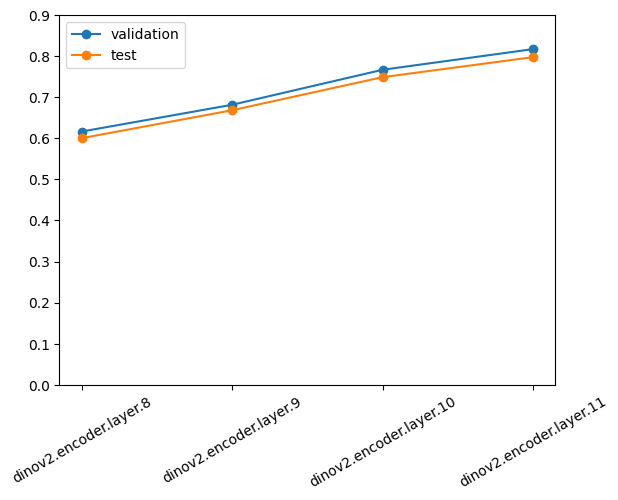

In [9]:
plt.plot(layers, val_acc, '-o', label='validation')
plt.plot(layers, test_acc, '-o', label='test')
plt.ylim([0, 0.9])
plt.legend()
_=plt.xticks(rotation=30)

This looks quite good. Performs very well compared to the linear probing

Worth noting:
- test performance is consistently worse that validation performance, since the validation was never really used for anything during training except monitoring. (Early stopping never kicked in, because the improvement was continuous.)

- I suspect that this is the result of distribution shift between the underlying train and validation splits (discussed here: https://iclr-blogposts.github.io/2025/blog/imagenet-flaws/) but worth keeping in mind for the future.


In [12]:
import torch.nn.functional as F

def rowwise_entropy(logits, dim=1):
    # Convert logits to probabilities
    probs = F.softmax(logits, dim=dim)
    # Calculate log probabilities, use torch.clamp to avoid log(0)
    log_probs = torch.log(probs + 1e-10)
    # Calculate entropy
    entropy = -torch.sum(probs * log_probs, dim=dim)
    return entropy

In [13]:
val_entropies = []
for layer in results_val.keys():
    if layer == 'label':
        continue
    val_entropies.append(pd.DataFrame({'entropy': rowwise_entropy(results_val[layer]),
                                       'layer': layer }))

val_entropies = pd.concat(val_entropies)


test_entropies = []
for layer in results_test.keys():
    if layer == 'label':
        continue
    test_entropies.append(pd.DataFrame({'entropy': rowwise_entropy(results_test[layer]),
                                       'layer': layer }))

test_entropies = pd.concat(test_entropies)


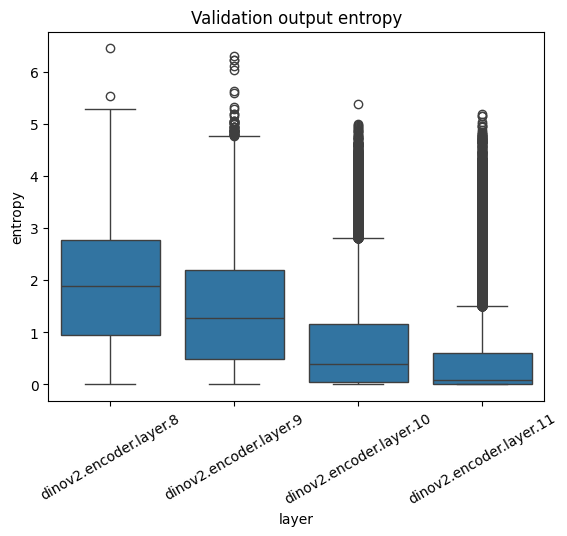

In [14]:
sns.boxplot(val_entropies, x='layer', y='entropy')
plt.title('Validation output entropy')
_=plt.xticks(rotation=30)

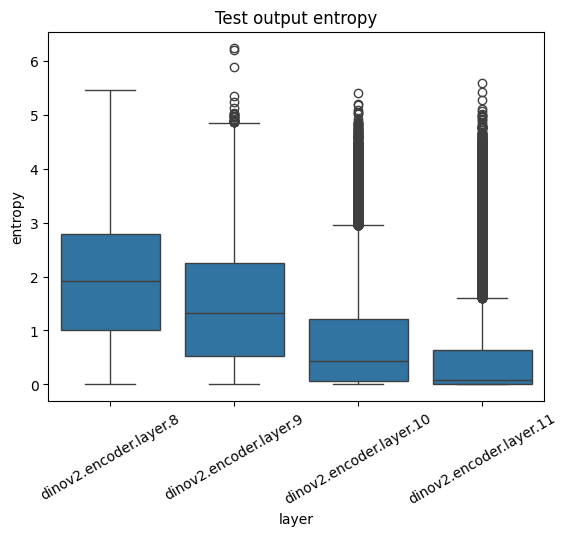

In [15]:
sns.boxplot(test_entropies, x='layer', y='entropy')
plt.title('Test output entropy')
_=plt.xticks(rotation=30)

Text(0.5, 1.0, 'test vs validation entropy')

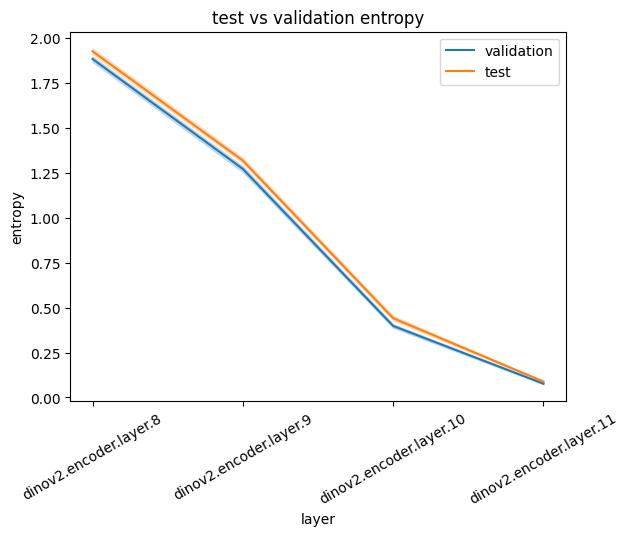

In [16]:
pi = 50
sns.lineplot(val_entropies, x='layer', y='entropy', estimator='median', label='validation')
sns.lineplot(test_entropies, x='layer', y='entropy', estimator='median', label='test')
plt.legend()
_=plt.xticks(rotation=30)
plt.title(f'test vs validation entropy')


The entropy decreases on in median (also on average) over the layers, but there is still supstantial overlap between the layers. Each ranges from almost 0 to almost maximum (~6.9) entropy. Test entropy (mean and median) is slightly higher than validation, as we would hope.

#### This is at whole population scale. What about within individual runs?

In [37]:
all_entropies = {}

for layer in results_val.keys():
    if layer == 'label':
        continue
    all_entropies[layer] = rowwise_entropy(results_val[layer])
        
sample_entropy = pd.DataFrame(all_entropies)    

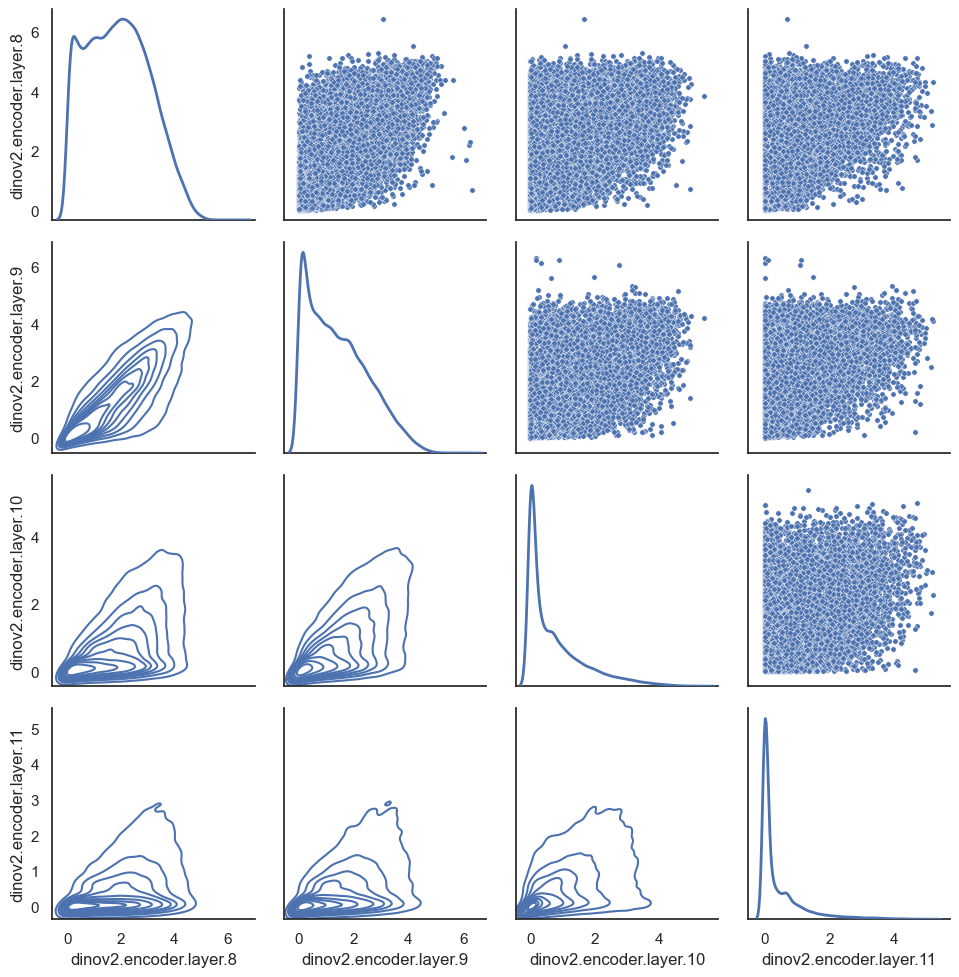

In [57]:
g = sns.PairGrid(sample_entropy, diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

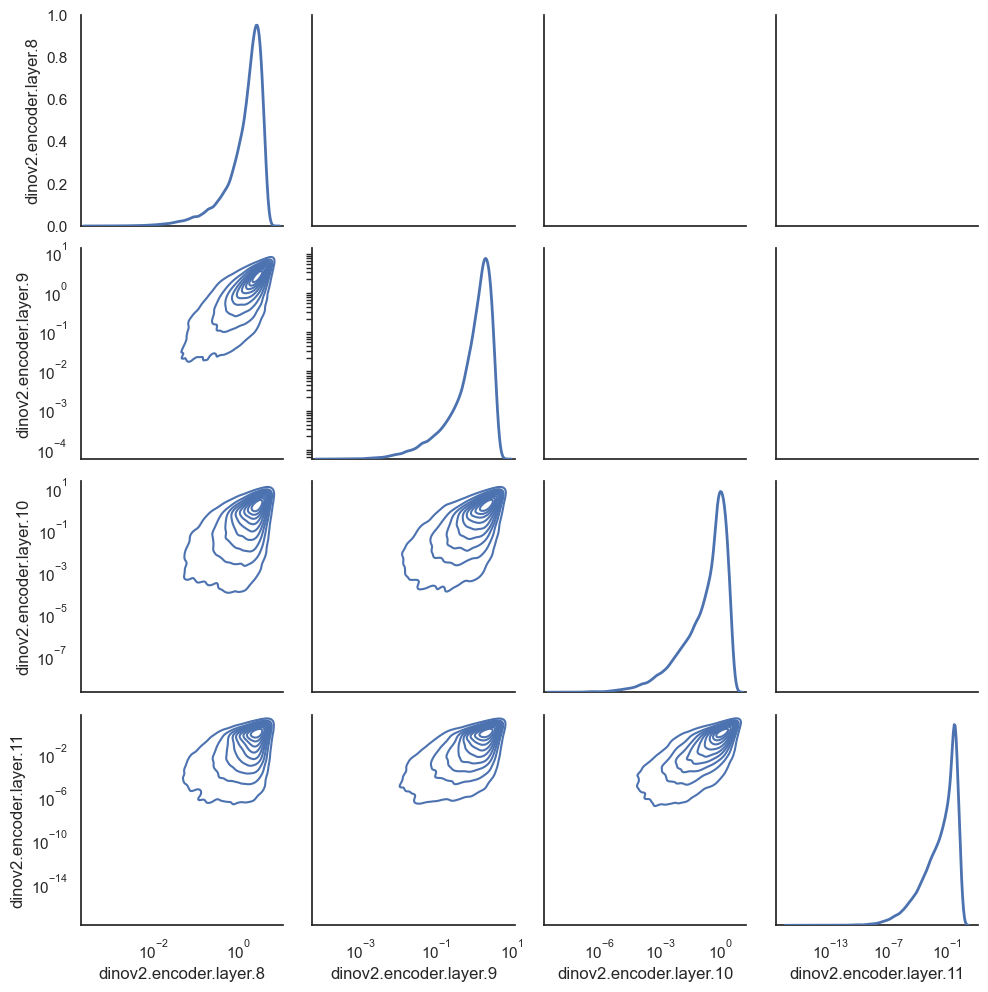

In [59]:
g = sns.PairGrid(sample_entropy, diag_sharey=False)
g.map_lower(sns.kdeplot, log_scale=True)
g.map_diag(sns.kdeplot, log_scale=True, lw=2)

In [60]:
sample_entropy.corr()

,dinov2.encoder.layer.8,dinov2.encoder.layer.9,dinov2.encoder.layer.10,dinov2.encoder.layer.11
dinov2.encoder.layer.8,1.000000,0.756044,0.541382,0.416022
dinov2.encoder.layer.9,0.756044,1.000000,0.630853,0.504857
dinov2.encoder.layer.10,0.541382,0.630853,1.000000,0.622826
dinov2.encoder.layer.11,0.416022,0.504857,0.622826,1.000000


Adjacent layer correlations are the strongest, while they start to breakdown for cross layer correlations. The log-scale looks more correlated, perhaps indicating some sort of power law relationship.

<Axes: >

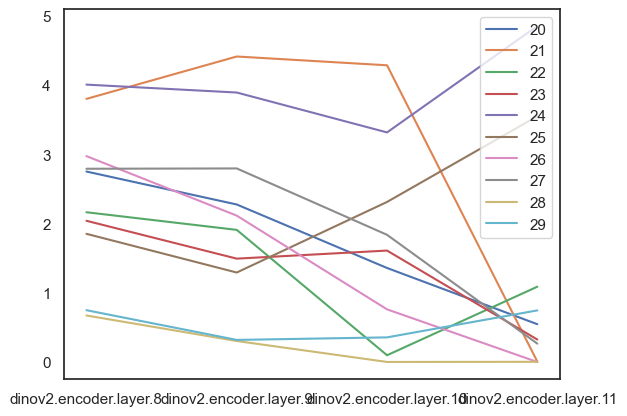

In [77]:
sample_entropy[20:30].T.plot()

In [100]:
sample_entropy.loc[25]


dinov2.encoder.layer.8     1.851604
dinov2.encoder.layer.9     1.293268
dinov2.encoder.layer.10    2.311435
dinov2.encoder.layer.11    3.548620
Name: 25, dtype: float32

In [101]:
results_val['label'][25]

tensor(531)

In [102]:
torch.argmax(results_val['dinov2.encoder.layer.11'][25])

tensor(577)

I keep looking for a smoothly decreasing entropy curve, sometimes finding that cases with an increasing entropy are wrong. However, this is not necessarily an incorrect behavior:
1. A high-uncertainy _should_ correspond to wrong cases more often than right (1000 labels)
2. Uncertainty _could_ go up: I think about things a bit more and realize that I'm not as certain as I thought I was.

These are both things that we don't want to disincentivize, since, again, they are not necessarily signs of a problem. The real question is how we can distinguish problematic behavior? To emphasize: we want to do this with _single_ trials for the adaptation case.

### One idea for a principle:
Changing my mind should make me less certain. Whenever there is a change in argmax, there should be either high uncertainty or increased uncertainty.

In [121]:
answers_and_entropies = {}

for layer in results_val.keys():
    if layer == 'label':
        answers_and_entropies[layer] = results_val[layer]
    else:
        answers_and_entropies[layer + '_entropy'] = rowwise_entropy(results_val[layer])
        answers_and_entropies[layer + '_decoded'] = results_val[layer].argmax(1)
        
answers_and_entropies = pd.DataFrame(answers_and_entropies)  

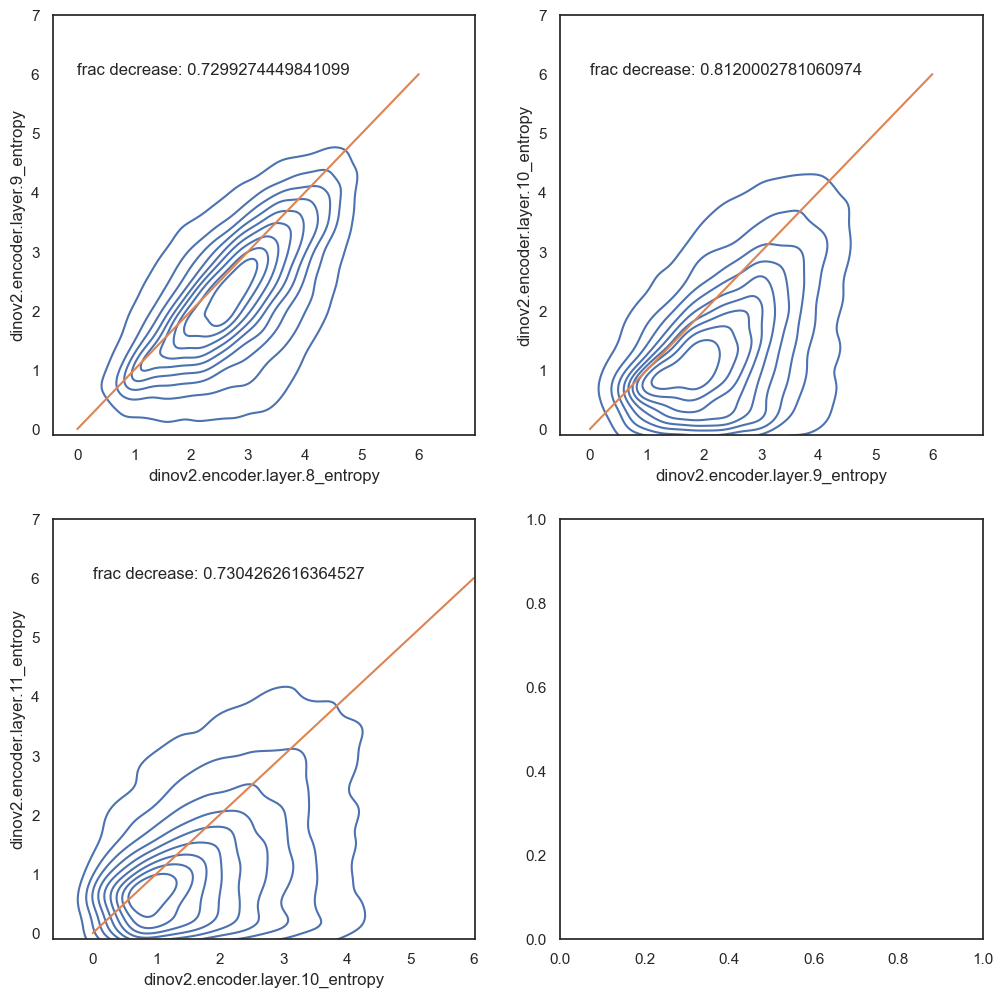

In [149]:
figsize(12,12)
plt.subplots(2,2)

for i, layer in enumerate(range(8, 11)):
    plt.subplot(2,2,i+1)
    # select only rows where there is a change
    layer1 = f'dinov2.encoder.layer.{layer}'
    layer2 = f'dinov2.encoder.layer.{layer+1}'
    early_change = answers_and_entropies[ answers_and_entropies[layer1 + '_decoded'] !=  answers_and_entropies[layer2 + '_decoded']]
    sns.kdeplot(early_change, x=layer1 + '_entropy', y=layer2 + '_entropy')
    
    plt.ylim([-0.1, 7])
    frac_decrease = (early_change[layer1 + '_entropy'] > early_change[layer2 + '_entropy']).mean()
    plt.text(0,6,f'frac decrease: {frac_decrease}')
    
    xs = np.linspace(0, 6)
    plt.plot(xs, xs);


In fact, we see the opposite: changing my mind made me _more_ certain. Of course, this is overlaid by a general decrease in cartainty across all layers..

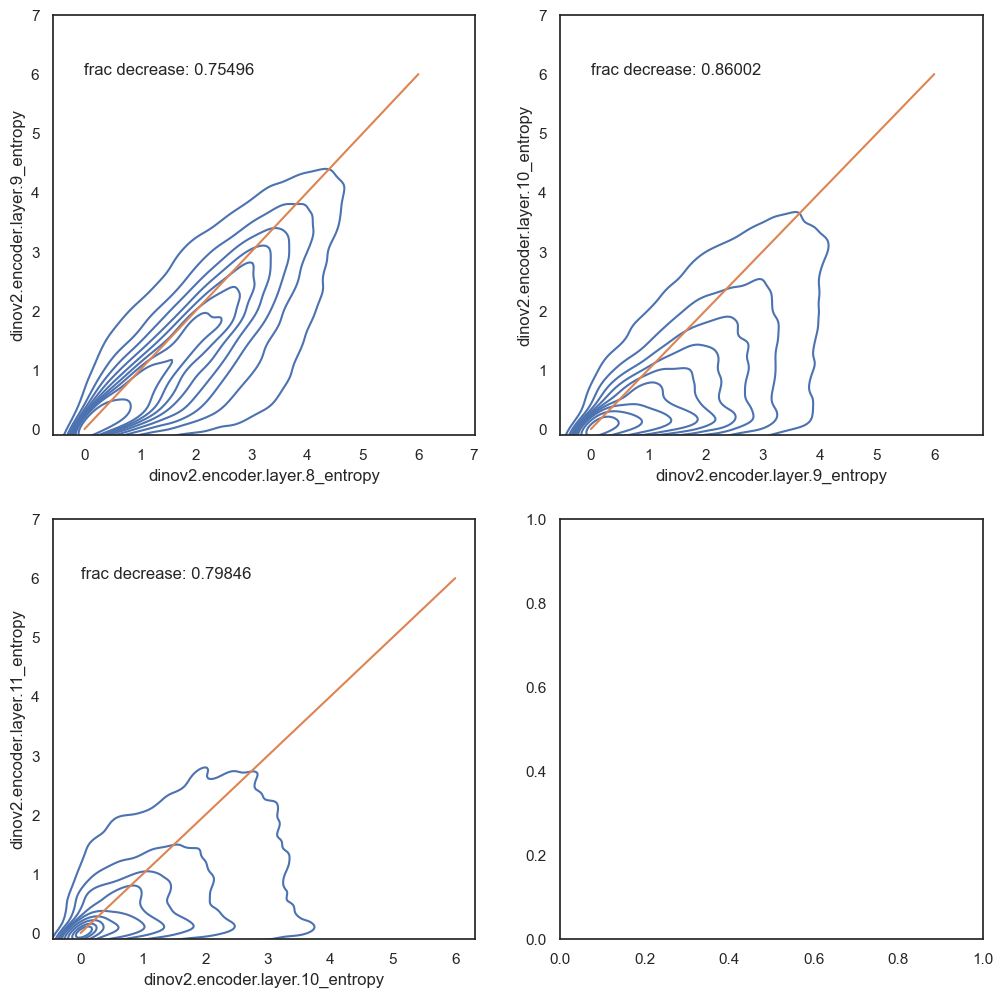

In [150]:
figsize(12,12)
plt.subplots(2,2)

for i, layer in enumerate(range(8, 11)):
    layer1 = f'dinov2.encoder.layer.{layer}'
    layer2 = f'dinov2.encoder.layer.{layer+1}'
    plt.subplot(2,2,i+1)
    sns.kdeplot(answers_and_entropies, x=layer1 + '_entropy', y=layer2 + '_entropy') 

    plt.ylim([-0.1, 7])
    frac_decrease = (answers_and_entropies[layer1 + '_entropy'] > answers_and_entropies[layer2 + '_entropy']).mean()
    plt.text(0,6,f'frac decrease: {frac_decrease}')
    
    xs = np.linspace(0, 6)
    plt.plot(xs, xs);

Given that the answer changes, there are _fewer_ samples that decrease in entropy, by a slight margin.

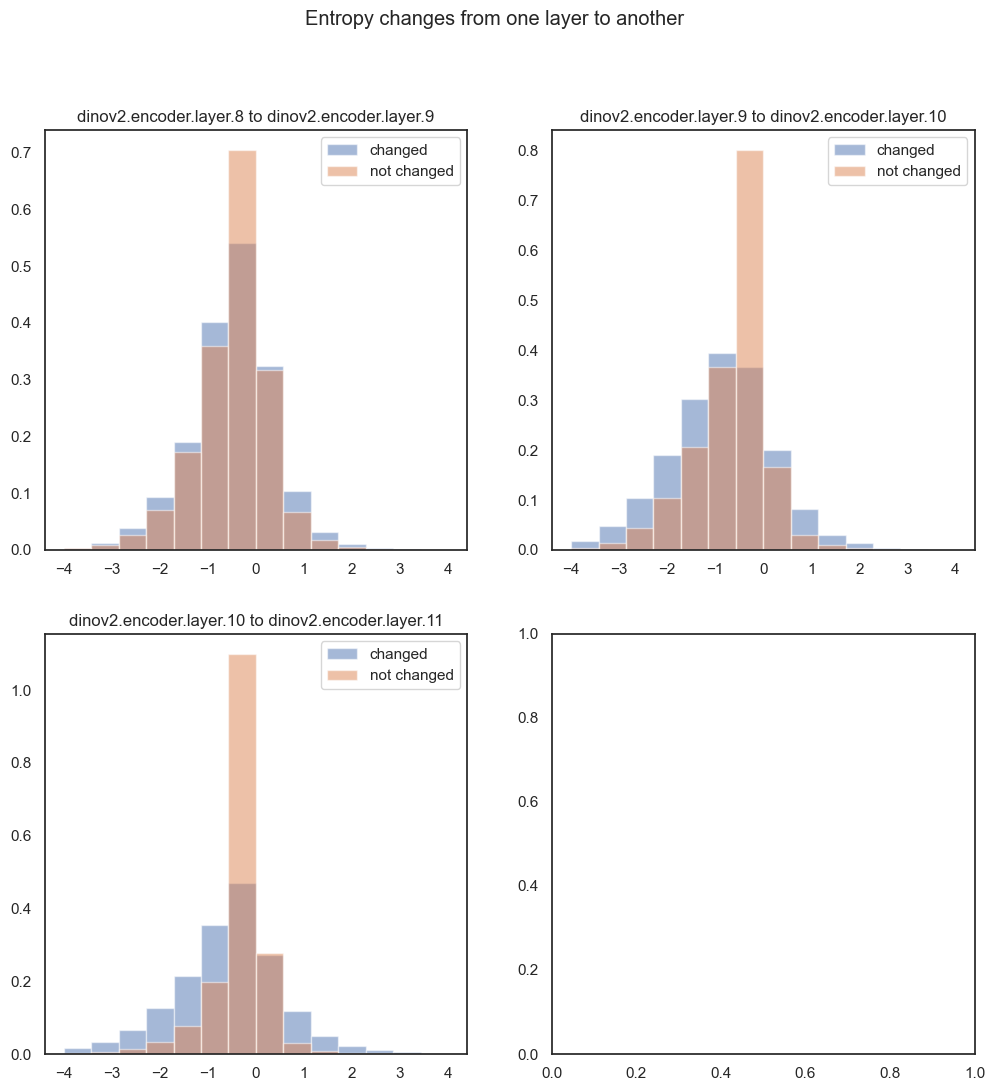

In [168]:
figsize(12,12)
plt.subplots(2,2)
plt.suptitle('Entropy changes from one layer to another')

for i, layer in enumerate(range(8, 11)):
    plt.subplot(2,2,i+1)
    # select only rows where there is a change
    layer1 = f'dinov2.encoder.layer.{layer}'
    layer2 = f'dinov2.encoder.layer.{layer+1}'

    plt.title(layer1 + ' to ' + layer2)

    entropy_delta = answers_and_entropies[layer2 + '_entropy'] - answers_and_entropies[layer1+ '_entropy']

    changed = answers_and_entropies[layer1 + '_decoded'] !=  answers_and_entropies[layer2 + '_decoded']

    plt.hist(entropy_delta[changed], bins=np.linspace(-4,4,15), alpha=0.5, density=True, label='changed')
    plt.hist(entropy_delta[~changed], bins=np.linspace(-4,4,15), alpha=0.5, density=True, label='not changed');

    plt.legend()



Interestingly backward from what I would have expected: the answers that did change tend to decrease _more_ than the answers that didn't. The larger fraction of decreases in the unchanged answer scenario is the result of a large number of cases that only decreased a small amount!

I think that the mistake in logic here is that:
- I start out uncertain, figure something out, get a new answer, and become more certain.

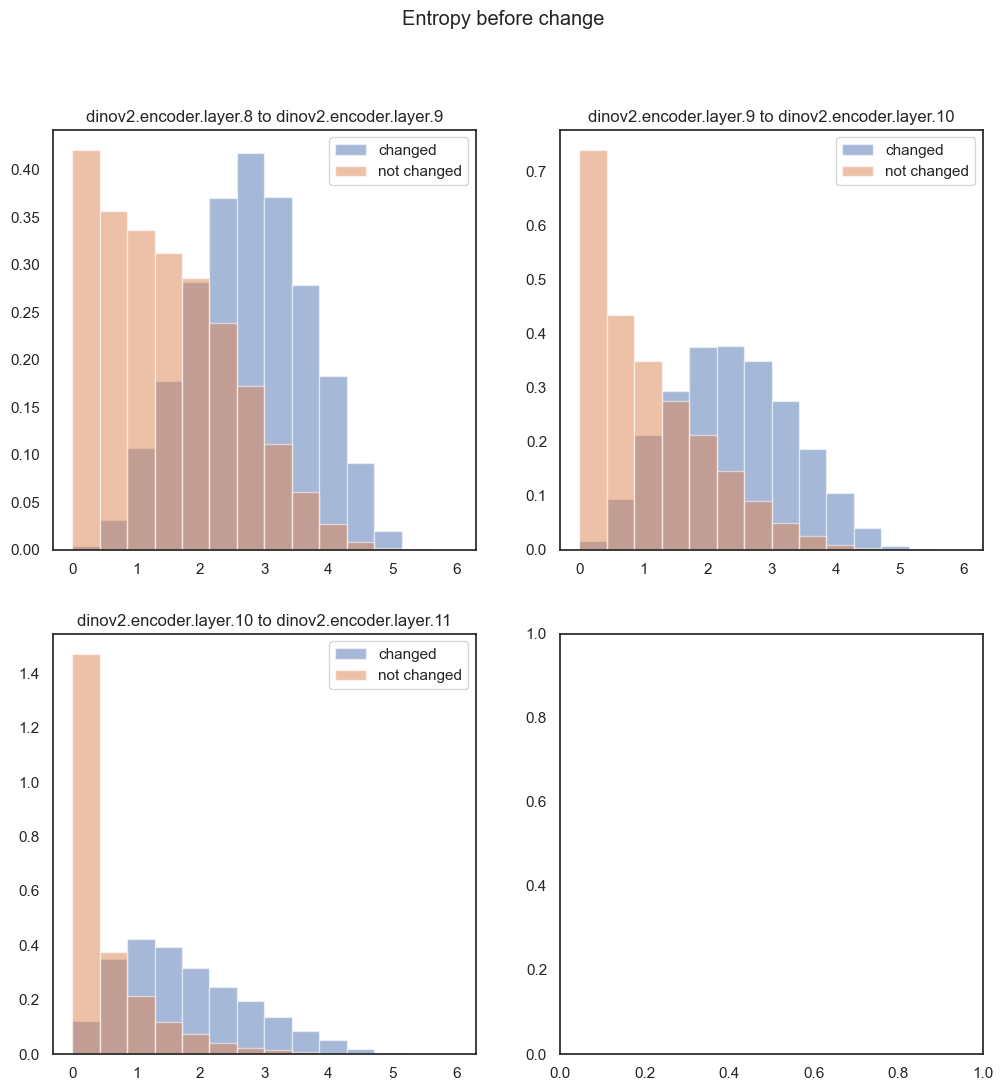

In [175]:
figsize(12,12)
plt.subplots(2,2)
plt.suptitle('Entropy before change')

for i, layer in enumerate(range(8, 11)):
    plt.subplot(2,2,i+1)
    # select only rows where there is a change
    layer1 = f'dinov2.encoder.layer.{layer}'
    layer2 = f'dinov2.encoder.layer.{layer+1}'

    plt.title(layer1 + ' to ' + layer2)

    changed = answers_and_entropies[layer1 + '_decoded'] !=  answers_and_entropies[layer2 + '_decoded']

    plt.hist(answers_and_entropies[layer1+ '_entropy'][changed], bins=np.linspace(0,6,15), alpha=0.5, density=True, label='changed')
    plt.hist(answers_and_entropies[layer1+ '_entropy'][~changed], bins=np.linspace(0,6,15), alpha=0.5, density=True, label='not changed');

    plt.legend()

Across all layers, the answers that changed tend to have higher entropy than the answers that didn't change. Good to see, easy to explain: I'm not sure, so I'm more likely to change.

## Combining model outputs:

For this section, I'll only use the validation set, to keep the test set around for later testing.

#### Can I squeeze out more performance just by averaging?

In [145]:
total = sum([value if key != 'label' else 0 for key, value in results_val.items()])

In [148]:
(total.argmax(1) == results_val['label']).float().mean()

tensor(0.8177)

In [150]:
(results_val[f'dinov2.encoder.layer.11'].argmax(1) == results_val['label']).float().mean()

tensor(0.8174)

Maybe we can squeeze out a drop more performance by averaging the predictions.

In [152]:
avg_results = (total.argmax(1) == results_val['label'])
last_results = (results_val[f'dinov2.encoder.layer.11'].argmax(1) == results_val['label']) 

In [158]:
(avg_results & (~last_results)).sum()

tensor(1953)

In [159]:
(last_results & (~avg_results)).sum()

tensor(1938)

The 'flips' are balanced, with a __very slight__ preference toward flipping correct...

#### Naive weighting by accuracy:

In [163]:
results_list = [results_val[f'dinov2.encoder.layer.{i}'] for i in range(8, 12)]

In [171]:
weighted_mean = sum([val_acc[i] * results_list[i] for i in range(4)])

In [172]:
(weighted_mean.argmax(1) == results_val['label']).float().mean()

tensor(0.8208)

In [173]:
weighted_results = (weighted_mean.argmax(1) == results_val['label'])

In [174]:
(weighted_results & (~last_results)).sum()

tensor(1914)

In [175]:
(last_results & (~weighted_results)).sum()

tensor(1743)

Less corrections to the final outputs, but a higher ratio of correct corrections.

#### Majority vote

In [206]:
best_found = [results_val[f'dinov2.encoder.layer.{i}'].argmax(1) for i in range(8, 12)]
best_found = torch.stack(best_found)

In [207]:
(torch.mode(best_found, dim=0).values == results_val['label']).float().mean()

tensor(0.7828)

Decreased accuracy. I think that this over-weights the un-reliable classifiers.

__Another question:__ how often is the right answer in _one_ of the the outputs?

In [212]:
(best_found == results_val['label']).any(0).float().mean()

tensor(0.8872)

88% of the time, at least one of the outputs has the right answer. Note that this is not even an upper bound, since there could also be multiple wrong answers that out-weigh a right answer.

### What if we just train to decode multiple layers at once?

Notes:
1. I've run a couple of different initializations of this training, with quite variable initial learning curves. Some struggle to pick up any signal at all in the first couple hundred steps.

In [2]:
from src.model.setup import image_model_setup
model_name = "facebook/dinov2-base"
dataset_name = "temp_dataset_subsample"

model, image_datasets, _ = image_model_setup(model_name, dataset_name, 1000)

W0203 14:13:50.437000 26504 torch/distributed/elastic/multiprocessing/redirects.py:29] NOTE: Redirects are currently not supported in Windows or MacOs.


import error: No module named 'triton'


Some weights of Dinov2ForImageClassification were not initialized from the model checkpoint at facebook/dinov2-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [3]:
from src.data.activity_dataset import OnlineLayerInputDataset
from src.model.CLS_token_probing import MultiModuleDecoder
from src.train.middle_decoders import train_module_decoder

In [4]:
layers = [ f'dinov2.encoder.layer.{i}' for i in range(8, 12)]

ds_train = OnlineLayerInputDataset(model, layers, image_datasets['train'], device='mps')
ds_validation = OnlineLayerInputDataset(model, layers, image_datasets['validation'], device='mps')

decoder = MultiModuleDecoder(4)

modules = {layer_name: model.module_dict[layer_name] for layer_name in layers}

model_out = train_module_decoder(decoder, modules, ds_train, ds_validation, max_epochs=5)
model_out.save_pretrained(f'joint_decoder')

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
wandb: Currently logged in as: lrast to https://api.wandb.ai. Use `wandb login --relogin` to force relogin



  | Name    | Type               | Params | Mode 
-------------------------------------------------------
0 | decoder | MultiModuleDecoder | 27.2 M | train
-------------------------------------------------------
27.2 M    Trainable params
0         Non-trainable params
27.2 M    Total params
108.872   Total estimated model params size (MB)
58        Modules in train mode
0         Modules in eval mode


Sanity Checking: |                                        | 0/? [00:00<?, ?it/s]

Training: |                                               | 0/? [00:00<?, ?it/s]

/Users/luke/.local/defaultPythonEnv/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:870: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved. New best score: 0.738


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved by 0.057 >= min_delta = 0.0. New best score: 0.794


Validation: |                                             | 0/? [00:00<?, ?it/s]

Metric val/accuracy improved by 0.019 >= min_delta = 0.0. New best score: 0.814

Detected KeyboardInterrupt, attempting graceful shutdown ...


NameError: name 'exit' is not defined

Killed after three epochs: the LR scheduler was starting to come back up. Generally, I think that this scheduling is not agressive enough.

The resulting output __did not__ produce accuracies that beat last layer decoding (they were comparable).

That said, even if this had produced an improvement, what would be the point?
1. The argument that this is a good way to readout ViT results from the neural network results would have been strengthened.
2. However, this wouldn't show that the multiple readouts are capturing independent information, as could be achieved by compositing their readouts. Would that even show such a thing?
   - It shows that _these particular_ readouts are capturing different information. However, it does not show that the information is not available in the layers. In particular if better model / training is used to extract it.


Top reported accuracy for Dinov2 base is given as 84.3% on google for probes. This shows that we have a lot of distance to make up before we can achieve state-of-the-art, not really worth it.

Steps to pursue this:
1. Use full imagenet training set.